# Object Recognition

There are some differentiation between Object Detection and Object Recognition. Both can work together but at this time we will discuss only about Object Recognition since we dont have a long time. However before we start, we need to know what Object Recognition is? Object Recognition is an act of identfying and classifying kind of objects based on the dataset we had gathered and trained before to produce output as a predicted label. On the other hand, object identification is an act of detect instances of semantic objects.

In [1]:
#Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 1. OpenCV installation 

In [3]:
#Before we continue, we need to install OpenCV
#There are two options when installing openCV
#First we can install the app which has an interface
#Second we can install and implement in python using pip
#I'm gonna use the second one since we will be working
#with Python and Neural Network

#This is the command when installing Pip :
#pip install opencv-python

In [2]:
import cv2
#importing opencv

## 2. RGB color

In [5]:
#Why color is needed because it is one of many ways 
#for machine to learn what object is that. Color seems
#dumb and reckless to learn but believe me it is important

<p style="border :2px rgb(255, 0, 0) solid">R:255, G:0, B:0

<p style="border :2px rgb(0, 255, 0) solid">R:0, G:255, B:0

<p style="border :2px rgb(0, 0, 255) solid">R:0, G:0, B:255

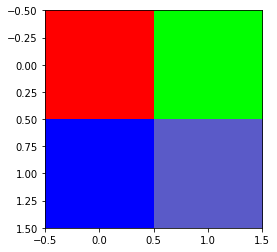

In [6]:
color_1 = [255,0,0] #red
color_2 = [0,255,0] #Green
color_3 = [0,0,255] #Blue
color_4 = [90, 90, 200] #Random
plt.imshow(np.array([
    [color_1, color_2],
    [color_3, color_4]
]))

## 3. Image

In [7]:
#Image is a set pixel of colors
#That is why we need to learn and know colors

![title](pikachu-pixel.jpg)

### 3.1 However how does image represented in Python ?

In [8]:
#Images as I said it is a set of pixels
#While in Python those pixels are stored in an array
#And in each array there is a RGB combination

#Imagine we have 256 combination of colors in each Red, Green and Blue
#[0, 255] = 256 for each R, G and B
256*256*256

16777216

(2, 2, 3)


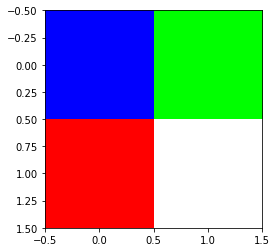

In [9]:
#Imagine we have a really simple image that settled by bunch
#of arrays. It stored in an array and each array has an unique 
#color that represents its object

colors = [
    [
        [0,0,255], #Blue
        [0,255,0]  #Green
    ],
    [
        [255,0,0], #red
        [255,255,255] #white
    ]
]

print(np.array(colors).shape)
plt.imshow(colors)

#Of course it is just an example. The real image will not 
#be like this. We have a lot of configuration pixels in real
#life :
#1. Full HD (1920 x 1080)
#2. HD (1280 x 720)
#3... so on
#Each pixel is a vector of 3 elements imagine the size
#1920 x 1080 x 3
 

### 3.2 How colors of image collected ? 

Still correlated with image and color, how does color and image work together ? And what the correlation with machine learning ? So, the deep learning algortihm are learning from its image from bunch pixels of colors. For instance, there is an image 'A' and have a dominant color coombination with : #9bb6c4 (grey), #3a5d1f(light green). So when we are going to predict of Object A, this two colors are mostly become identity for a machine to put label as an object 'A'.

## 4. OpenCV

In [10]:
#Open CV in a brief is a library for vision
#It stands for "Open Source Computer Vision Library"
#Has many features, tools, even algorithms to manage
#and utilizes the image from computer resources (Webcam or Camera)

In [11]:
#Now it is time to playing with real image
#Lets see if the real image represented as an array or or not
#read image
image = cv2.imread("phone.png")

In [12]:
type(image)
#As you can see it represented as an array

numpy.ndarray

In [13]:
image.shape
#The size of the pixels is 335, 220

(335, 220, 3)

Proof of the real image

![title](proof of phone.png)

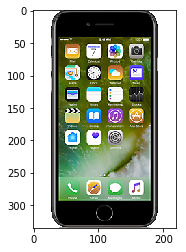

In [14]:
#Visualise the image with matplotlibe insted of using markdown
plt.imshow(image)
#We can see the entire image with its size

### 4.1 Standarize the format 

In [15]:
#Because the format of OpenCV for color is a bit different
#Which they used BGR instead of RGB which is not common
#Then we need to change reformat it into RGB

#parse BGR 2 RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

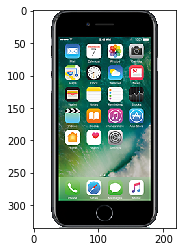

In [16]:
plt.imshow(image)

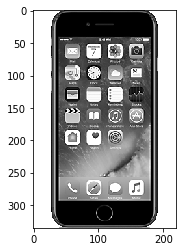

In [17]:
#besides RGB, we also can convert it to Grey Scale
#but it is not necessary
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap = 'gray')

### 4.2 Resize the image 

In [18]:
#Why resizing images important ? because machine will
#take longer time to learn if we put the large size
#Also in this occasion we mostly ignoring the aspect of ratio
#but please consider not every images need to be resized
#some of images that have uniqueness need to consider to not be
#resized.
WIDTH = 300
HEIGHT = 300

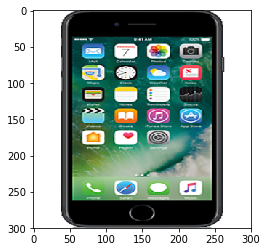

In [21]:
resized = cv2.resize(image, (WIDTH, HEIGHT))

plt.imshow(resized)

## 5. Camera using OpenCV

In [18]:
camera = cv2.VideoCapture(0)

while(True):
    _, frame = camera.read()
    
    
    cv2.imshow("Capturing frames ", frame)
    #The name of the program
    
    #For exit the camera press q
    #Remember the uppercase and lowercase take an effect
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
camera.release()
cv2.destroyAllWindows()

In [27]:
camera = cv2.VideoCapture(0)
HEIGHT = 500
RAW_FRAMES = []

while(True):
    #this one is for reading the frame
    _, frame = camera.read()
    
    #while this script for flipping the frame
    frame = cv2.flip(frame, 1)
    
    #rescaling camera output
    #this one is important
    #for our produced image
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * HEIGHT) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, HEIGHT))
    
    #make area of our object
    #to draw a rectangle, we need top-left corner and bottom-right corner of rectangle
    cv2.rectangle(frame, (150, 75), (525, 425), (0, 255, 0), 2)
    
    cv2.imshow("Capturing frames", frame)
    
    key = cv2.waitKey(1)
    
    #for exit using q
    if key & 0xFF == ord("q"):
        #exiting camera
        break
    elif key & 0xFF == ord("s"):
        #saving frames
        RAW_FRAMES.append(frame)
        
        #preview the frame after pressing s
        plt.imshow(frame)
        plt.show()
        
camera.release()
cv2.destroyAllWindows()

![title](trial.png)

In [27]:
type(RAW_FRAMES)

list

In [ ]:
#So now every image captures pressing "s"
#will be stored in RAW_FRAMES

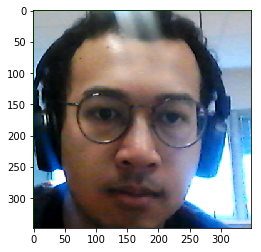

In [29]:
#But as you can see every images captured still not cropped yet
#and the rectangle is not well functionalized
images = []

for frame in RAW_FRAMES:
    #get Green Area :
    roi = frame[75+1:425-1, 150+1:525-1]
    
    #remember that opencv using BGR
    #we need to convert them to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    
    #append to our new array
    images.append(roi)
    
    plt.imshow(roi)
    plt.show()

In [31]:
#Okay now we got our cropped image
images[0].shape

(348, 348, 3)

## 6. Using camera to create a dataset of images 

Now as a supplementary we can use opencv to create a dataset by just pressing the button.

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

camera = cv2.VideoCapture(0)
camera_height = 500
raw_frames_type_1 = []
raw_frames_type_2 = []
#At this example, for instance we want to distinguish two objects
#so we create a two array

while(True):
    _, frame = camera.read()
    
    frame = cv2.flip(frame, 1)
    
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height)
    frame = cv2.resize(frame, (res, camera_height))
    
    cv2.rectangle(frame, (150, 75), (525, 425), (0, 255, 0), 2)
    
    cv2.imshow("Capturing frames", frame)
    
    key = cv2.waitKey(1)
    
    #quit camera if "q" is pressed
    
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("1"):
        raw_frames_type_1.append(frame)
        print('1 key is pressed - saved to type 1')
        
    elif key & 0xFF == ord("2"):
        raw_frames_type_2.append(frame)
        print('2 key is pressed - saved to type 2')
        
camera.release()
cv2.destroyAllWindows()
#Now when button 1 is pressed then they will be stored in raw frame1
#Also with button 2

1 key is pressed - saved to type 1
1 key is pressed - saved to type 1
2 key is pressed - saved to type 2
2 key is pressed - saved to type 2
1 key is pressed - saved to type 1
1 key is pressed - saved to type 1
2 key is pressed - saved to type 2
2 key is pressed - saved to type 2
1 key is pressed - saved to type 1
1 key is pressed - saved to type 1
2 key is pressed - saved to type 2
2 key is pressed - saved to type 2


In [46]:
for i, frame in enumerate(raw_frames_type_1):
    
    roi = frame[75+2:425-2, 300+2:650-2]
    
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    
    #resize the image into 224**2
    roi = cv2.resize(roi, (224, 224))
    
    
    cv2.imwrite('type1/{}.png'.format(i), cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    

#Now it is time for raw_frames_2
for i, frame in enumerate(raw_frames_type_2):
    
    #get the inside of
    roi = frame[75+2:425-2, 300+2:650-2]
    
    #Convert to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    
    roi = cv2.resize(roi, (224, 224))
    
    cv2.imwrite('type2/{}.png'.format(i), cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    

## 7. Core - Object Recognition

We can build object recognition using two techniques :

    1. Using our own datasets
    2. Using pre-trained datasets
    
Things to note here, for our own datasets, if we want to predict something has bigger scope (All of fruits/animals in whole world) then it will take a long time. But if we want to distinguish between a few of objects that has uniqueness then we can build our own datasets

Furthermore, pre-trained datasets, are more flexible and easy to use. It also covers a lot of objects that has been trained before, so I doubt that it will not recognize our common daily objects such as cellphone, pen, shoes and etc.

In this ocassion I will use both of them

### 7.1 Using pre-trained datasets 

In [1]:
#Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [2]:
#We are gonna using datasets provided by
#Google Datasets competitions
#named as imagenet

#bet we are gonna access it through keras
#Keras Applications are deep learning models
#that are made available alongside pre-trained weights

#So Keras was provided model that ready to use
#Let's rool

#I forgot something important
#you need to install Keras and Tensorflow before

from keras.applications import inception_v3
#again as I said, we just need to import inception_v3 from keras

model = inception_v3.InceptionV3(weights='imagenet')
#why inceptionv3 ? because it is the latest version published
#by google

model.summary()

C:\Users\hafiz\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

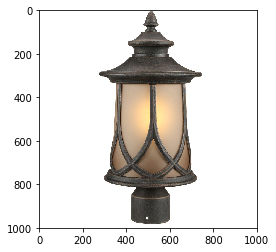

In [58]:
from PIL import Image

image = Image.open('haha.jpg')

plt.imshow(image)

In [59]:
from keras import preprocessing

img = preprocessing.image.load_img('haha.jpg', target_size = (299, 299))
x = preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = inception_v3.preprocess_input(x)
predictions = model.predict(x)
labels = inception_v3.decode_predictions(predictions, top=3)[0]

labels

[('n04380533', 'table_lamp', 0.8272302),
 ('n03637318', 'lampshade', 0.089270726),
 ('n03903868', 'pedestal', 0.0120059885)]

In [4]:
import time 

# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frameq
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (150, 75), (525, 425), (240, 100, 0), 2)

    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # resize to 224*224
    roi = cv2.resize(roi, (399, 399))
    roi = inception_v3.preprocess_input(roi)

    # predict!
    roi2 = np.array([cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)])

    predictions = model.predict(roi2)

    labels = inception_v3.decode_predictions(predictions, top=3)[0]

    # add text
    label_1 = '{} - {}%'.format(labels[0][1], int(labels[0][2]*100))
    cv2.putText(frame, label_1, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 240, 150), 2)

    # add text
    label_2 = '{} - {}%'.format(labels[1][1], int(labels[1][2]*100))
    cv2.putText(frame, label_2, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 240, 240), 2)

    # add text
    label_3 = '{} - {}%'.format(labels[2][1], int(labels[2][2]*100))
    cv2.putText(frame, label_3, (70, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 20, 240), 2)

    # show the frame
    cv2.imshow("Real Time object detection", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

### 7.2 Using our datasets 

In [1]:
# In this part, we will be more focused on how 
# the machines can identify our defined datasets
# I'd like to say sorry before, because I don't have a lot of stuffs in my room

import pandas as pd
import numpy as np
import os
import random
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing

%matplotlib inline


C:\Users\hafiz\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# There are only 3 different objects that I have surround to recognize using webcam :
# Sorry, Because the orange and the beer had been consumed
# 1. Phone
# 2. Bottle
# 3. Orange
object_class_webcam = ['Phone', 'Bottle', 'Orange']

In [7]:
# Next we can use either webcam or our photos
# A. In case if I want to use a webcam for capturing the datasets then you can capture the picture using the webcam :

camera = cv2.VideoCapture(0)
camera_height = 500
raw_frames_type_1 = []
raw_frames_type_2 = []
raw_frames_type_3 = []
# At this occassion since we have only 3 objects
# then we will create 3 array

while(True):
    _, frame = camera.read()
    
    frame = cv2.flip(frame, 1)
    #frame as a parameter is also behave as a reading new frame
    #flip basically whether they want to read an image vertically or horizontally 
    #0 for vertically
    #1 for horizontally
    
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height)
    frame = cv2.resize(frame, (res, camera_height))
    
    cv2.rectangle(frame, (150, 75), (525, 425), (0, 255, 0), 2)
    
    cv2.imshow("Capturing frames", frame)
    #showing the frame
    
    key = cv2.waitKey(25)
    #waitKey(0) will display the window infinitely 
    #until any key is pressed (it is suitable for image display). 
    #waitKey(25) will display a frame for 25 ms
    
    #quit camera if "q" is pressed
    
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("1"):
        raw_frames_type_1.append(frame)
        print('1 key is pressed - saved to type 1')
        
    elif key & 0xFF == ord("2"):
        raw_frames_type_2.append(frame)
        print('2 key is pressed - saved to type 2')
        
    elif key & 0xFF == ord("3"):
        raw_frames_type_3.append(frame)
        print('3 key is pressed - saved to type 3')
        
camera.release()
cv2.destroyAllWindows()
#Now when button 1 is pressed then they will be stored in raw frame1 Also with button 2

1 key is pressed - saved to type 1
1 key is pressed - saved to type 1
1 key is pressed - saved to type 1
1 key is pressed - saved to type 1
1 key is pressed - saved to type 1
2 key is pressed - saved to type 2
2 key is pressed - saved to type 2
2 key is pressed - saved to type 2
2 key is pressed - saved to type 2
2 key is pressed - saved to type 2
3 key is pressed - saved to type 3
3 key is pressed - saved to type 3
3 key is pressed - saved to type 3
3 key is pressed - saved to type 3
3 key is pressed - saved to type 3


## Make a Folder

In [4]:
width_pic = 400
height_pic = 400

In [9]:
for i in range(1, 4):
    name = './data/images_{}'.format(i)
    os.makedirs(name, exist_ok = True)
#So this function will create and assign the directory
#to the 'name' attributes for 5 increments (You can change it by the amount of
# you pressing the button)

## Writing the Image 

In [14]:
#And we will do this specifically for each type of objects
for i, frame in enumerate(raw_frames_type_1): #why enum because they still stored in buffer/array
    ob = frame[75+2:425-2, 150+2:525-2]
    #this is for getting the object from the rectangle we have in a frame
    ob = cv2.cvtColor(ob, cv2.COLOR_BGR2RGB)
    #as you know that cv2 has a BGR format
    #therefore we need to convert it into RGB
    ob = cv2.resize(ob, (width_pic, height_pic))
    #resizing the image based on the defined size we had above
    cv2.imwrite('./data/images_1/{}.png'.format(i), cv2.cvtColor(ob, cv2.COLOR_BGR2RGB))
    #then we write our captured with this format
    #for making sure, we convert it aging to RGB
    
for i, frame in enumerate(raw_frames_type_2): #why enum because they still stored in buffer/array
    ob = frame[75+2:425-2, 150+2:525-2]
    #this is for getting the object from the rectangle we have in a frame
    ob = cv2.cvtColor(ob, cv2.COLOR_BGR2RGB)
    #as you know that cv2 has a BGR format
    #therefore we need to convert it into RGB
    ob = cv2.resize(ob, (width_pic, height_pic))
    #resizing the image based on the defined size we had above
    cv2.imwrite('./data/images_2/{}.png'.format(i), cv2.cvtColor(ob, cv2.COLOR_BGR2RGB))
    #then we write our captured with this format
    #for making sure, we convert it aging to RGB
    
for i, frame in enumerate(raw_frames_type_3): #why enum because they still stored in buffer/array
    ob = frame[75+2:425-2, 150+2:525-2]
    #this is for getting the object from the rectangle we have in a frame
    ob = cv2.cvtColor(ob, cv2.COLOR_BGR2RGB)
    #as you know that cv2 has a BGR format
    #therefore we need to convert it into RGB
    ob = cv2.resize(ob, (width_pic, height_pic))
    #resizing the image based on the defined size we had above
    cv2.imwrite('./data/images_3/{}.png'.format(i), cv2.cvtColor(ob, cv2.COLOR_BGR2RGB))
    #then we write our captured with this format
    #for making sure, we convert it aging to RGB

## Loading Images 

In [3]:
#We can showing the pictures of each class types
#The question maybe emerged, why we resize the image again ?
#Because I want to minimize the duration for machine to learn
#otherwise it will take a very long time

width = 100
#Fixed width
height = 100
#Fixed height

#why we need load_images function instead of the imread regular one ?
#Well I can use cv2.imread actually, but it doesn't reusable and only operates on one file
#Then I need a function that will open an image as well resize it in the same time
#so it can't do on whole type

def load_images(base_path):
    images = []
    #images as a buffer
    path = os.path.join(base_path, '*.png')
    #Put the base path as the directory
    for image_path in glob(path):
        image = preprocessing.image.load_img(image_path, target_size=(width, height))
        x = preprocessing.image.img_to_array(image)
        # Image is nothing, they are just a bunch of array
        # furthermore about preprocessing can be found https://keras.io/preprocessing/image/
        images.append(x)
    return images

#I just load the images from my storage 
images_type_1 = load_images('./data/images_1')
images_type_2 = load_images('./data/images_2')
images_type_3 = load_images('./data/images_3')

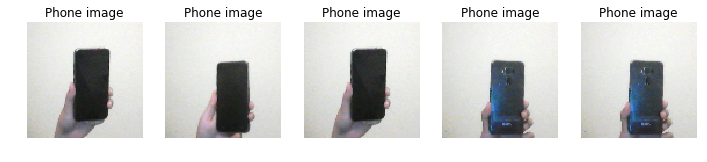

In [4]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_1))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(object_class_webcam[0]))

# show the plot
plt.show()

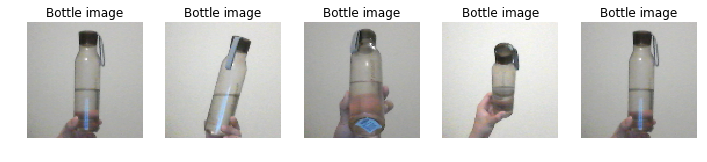

In [5]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_2))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(object_class_webcam[1]))

# show the plot
plt.show()

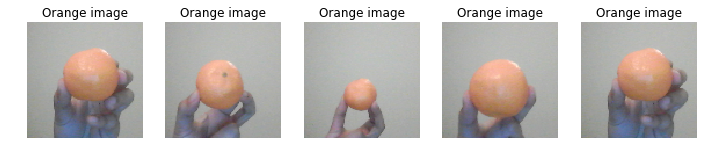

In [6]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_3))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(object_class_webcam[2]))

# show the plot
plt.show()

##  Convert Images to Numpy

In [7]:
# Convert Images as numpy array
X_type_1 = np.array(images_type_1)
X_type_2 = np.array(images_type_2)
X_type_3 = np.array(images_type_3)

print(X_type_1.shape)
print(X_type_2.shape)
print(X_type_3.shape)

(5, 100, 100, 3)
(5, 100, 100, 3)
(5, 100, 100, 3)


In [8]:
# We will concatinate the 3 types of features
X = np.concatenate((X_type_1, X_type_2, X_type_3), axis=0)
X.shape

(15, 100, 100, 3)

In [9]:
# Since we have 255 RGB color, we will divide it by 
X = X / 255
X.shape

(15, 100, 100, 3)

In [10]:
from keras.utils import to_categorical
# Give categorical value to the images
y_type_1 = [0 for item in enumerate(X_type_1)]
y_type_2 = [1 for item in enumerate(X_type_2)]
y_type_3 = [2 for item in enumerate(X_type_3)]

y = np.concatenate((y_type_1, y_type_2, y_type_3), axis=0)

y = to_categorical(y, num_classes=len(object_class_webcam))

print(y.shape)

(15, 3)


In [11]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

# A documentation we about keras we can find it :
# https://keras.io/getting-started/sequential-model-guide/
# https://towardsdatascience.com/how-to-build-a-neural-network-with-keras-e8faa33d0ae4

# default parameters
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 30
batch_size = 32
color_channels = 3

# Above, there are some parameters we can configure in Keras
# https://keras.io/getting-started/sequential-model-guide/
# What is convolutional ?  convolution is a mathematical operation on two functions 
# to produce a third function that expresses how the shape of one is modified by the other

def build_model(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,
                dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,
                dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,
                lr=lr):
    #Creating the model
    model = Sequential()

    #Convolution are made up of neurons that have learnable weights and biases. 
    #Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity
    #For more info : http://cs231n.github.io/convolutional-networks/
    model.add(Convolution2D(conv_1, (3, 3),
                            input_shape=(width, height, color_channels),
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_1_drop))
    
    #Relu : Rectified Linear Unit
    #ReLU is the most used activation function in the world right now.
    #Since, it is used in almost all the convolutional neural networks or deep learning
    model.add(Convolution2D(conv_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_2_drop))
    
    model.add(Flatten())
    #Flatten the inputs
        
    #Here we have 2 layer
    #The reasons behind this is because the model is not that complex
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))

    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))

    #Softmax is more generalized logistic activation function which is used for multiclass classification
    model.add(Dense(len(object_class_webcam), activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])

    return model

In [12]:
import numpy as np
np.random.seed(1) # for reproducibility

# model with base parameters
model = build_model()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16928)             0         
__________

In [16]:
#Here I'm gonna put how many epochs regarding the type of the images that I have
#What does epochs mean ?
#Epochs is basically separating the data we had trained before into more small units into batches
#It's impossible to put epochs 1 since its too big and will overfitting
model.fit(X, y, epochs=15)

Epoch 1/15
15/15 [==============================] - 1s 92ms/step - loss: 0.2157 - acc: 0.8667
Epoch 2/15
15/15 [==============================] - 1s 82ms/step - loss: 0.3000 - acc: 0.8667
Epoch 3/15
15/15 [==============================] - 1s 86ms/step - loss: 0.0842 - acc: 1.0000
Epoch 4/15
15/15 [==============================] - 1s 79ms/step - loss: 0.1615 - acc: 0.9333
Epoch 5/15
15/15 [==============================] - 1s 75ms/step - loss: 0.0661 - acc: 1.0000
Epoch 6/15
15/15 [==============================] - 1s 75ms/step - loss: 0.0595 - acc: 1.0000
Epoch 7/15
15/15 [==============================] - 1s 70ms/step - loss: 0.1288 - acc: 0.9333
Epoch 8/15
15/15 [==============================] - 1s 66ms/step - loss: 0.0571 - acc: 1.0000
Epoch 9/15
15/15 [==============================] - 1s 100ms/step - loss: 0.1267 - acc: 0.9333
Epoch 10/15
15/15 [==============================] - 1s 84ms/step - loss: 0.0331 - acc: 1.0000
Epoch 11/15
15/15 [==============================] - 1s 90

In [14]:
import time 

# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frameq
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (150, 75), (525, 425), (0, 255, 0), 2)

    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    #for caputring the image
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    #ready for converting the color to rgb

    # resize
    roi = cv2.resize(roi, (width, height))
    #IMAGE RESIZING for machine easier to understand
    
    # expand the shape of an array
    roi_X = np.expand_dims(roi, axis=0)
    #THE MOST IMPORTANTPART
    predictions = model.predict(roi_X)
    type_1_pred, type_2_pred, type_3_pred = predictions[0]

    # add text
    type_1_text = '{}: {}%'.format(object_class_webcam[0], int(type_1_pred*100))
    #will be calculated how much the percentage from the type 1 array of predictioncs
    cv2.putText(frame, type_1_text, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    tipe_2_text = '{}: {}%'.format(object_class_webcam[1], int(type_2_pred*100))
    #will be calculated how much the percentage from the type 2 array of predictioncs
    cv2.putText(frame, tipe_2_text, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    tipe_3_text = '{}: {}%'.format(object_class_webcam[2], int(type_3_pred*100))
    #will be calculated how much the percentage from the type 3 array of predictioncs
    cv2.putText(frame, tipe_3_text, (70, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)


    # show the frame
    cv2.imshow("Test out", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

In [29]:
model.save('stuff_cnn_model.h5')

# 8. Cross Validation 

In [15]:
# In image/object recognition we can use multiple way to know how accurate our object is. There are some ways such as :
# 1. Automatic Verification Dataset (Keras parameter already provided this type)
# 2. Manual Vertification Dataset (We manually separate, test set and train set)
# 3. Manual KFold Cross Validation (Using stratified Kfold )
# However we are gonna make it simple by using the two first function

In [26]:
# 1. Automatic Verification Dataset :
# !-- model.fit(X, y, epochs=30)
# We can modify the fit parameters be like this :
model.fit(X, y, validation_split = 0.9, epochs=9)

Train on 1 samples, validate on 14 samples
Epoch 1/9
1/1 [==============================] - 1s 784ms/step - loss: 0.0655 - acc: 1.0000 - val_loss: 0.7438 - val_acc: 0.9286
Epoch 2/9
1/1 [==============================] - 1s 742ms/step - loss: 0.0965 - acc: 1.0000 - val_loss: 0.7242 - val_acc: 0.9286
Epoch 3/9
1/1 [==============================] - 1s 849ms/step - loss: 0.0893 - acc: 1.0000 - val_loss: 0.6969 - val_acc: 0.9286
Epoch 4/9
1/1 [==============================] - 1s 724ms/step - loss: 0.0350 - acc: 1.0000 - val_loss: 0.6646 - val_acc: 0.9286
Epoch 5/9
1/1 [==============================] - 1s 742ms/step - loss: 0.0344 - acc: 1.0000 - val_loss: 0.6282 - val_acc: 0.9286
Epoch 6/9
1/1 [==============================] - 1s 756ms/step - loss: 0.0070 - acc: 1.0000 - val_loss: 0.5879 - val_acc: 0.9286
Epoch 7/9
1/1 [==============================] - 1s 959ms/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.5451 - val_acc: 0.9286
Epoch 8/9
1/1 [==============================] - 1s 81

In [34]:
# 2. Manual Verification Dataset
# we also can manually specify by ours
# like this for instance
# 67 % for training and 33 % for test
from sklearn.model_selection import train_test_split
import numpy as np
seed = 6
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=9)

Train on 10 samples, validate on 5 samples
Epoch 1/9
10/10 [==============================] - 1s 97ms/step - loss: 0.0416 - acc: 1.0000 - val_loss: 0.1916 - val_acc: 1.0000
Epoch 2/9
10/10 [==============================] - 1s 102ms/step - loss: 0.0250 - acc: 1.0000 - val_loss: 0.2115 - val_acc: 1.0000
Epoch 3/9
10/10 [==============================] - 1s 98ms/step - loss: 9.0185e-04 - acc: 1.0000 - val_loss: 0.2251 - val_acc: 1.0000
Epoch 4/9
10/10 [==============================] - 1s 103ms/step - loss: 6.6503e-04 - acc: 1.0000 - val_loss: 0.2343 - val_acc: 1.0000
Epoch 5/9
10/10 [==============================] - 1s 109ms/step - loss: 0.0102 - acc: 1.0000 - val_loss: 0.2398 - val_acc: 1.0000
Epoch 6/9
10/10 [==============================] - 1s 112ms/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.2433 - val_acc: 1.0000
Epoch 7/9
10/10 [==============================] - 1s 96ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.2453 - val_acc: 1.0000
Epoch 8/9
10/10 [==================